In [1]:
import numpy, matplotlib, pickle

#matplotlib.use ('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
with open ('results_AILVOICH_1D.p', 'rb') as f:
    results = pickle.load (f)
f.close ()

In [3]:
plotPath = 'plots/'

queuetypes = ['preemptive', 'nonPreemptive']
diseasenames = ['LVO', 'ICH']
colors = {'sim_LVO':'lightcoral', 'sim_ICH':'lightskyblue', 'theory_LVO':'red', 'theory_ICH':'blue'}

## Traffic

diseaseProbICH = 0.211 from 10.2214/AJR.24.31639, Table 1

diseaseProbLVO = 0.125 from 10.3389/fneur.2023.1179250, p.3

sameReadTime = 30

groupProbNCCT = 0.7

groupProbCTA  = 0.3

AILVOSe = 0.9236

AILVOSp = 0.9143

AIICHSe = 0.9362

AIICHSp = 0.9343

nRad = 1

C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_16896\2295283685.py:62: RuntimeWarning: divide by zero encountered in divide
  ratio = prem / nonprem
C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_16896\2295283685.py:62: RuntimeWarning: invalid value encountered in divide
  ratio = prem / nonprem
C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_16896\2295283685.py:71: RuntimeWarning: invalid value encountered in divide
  ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)


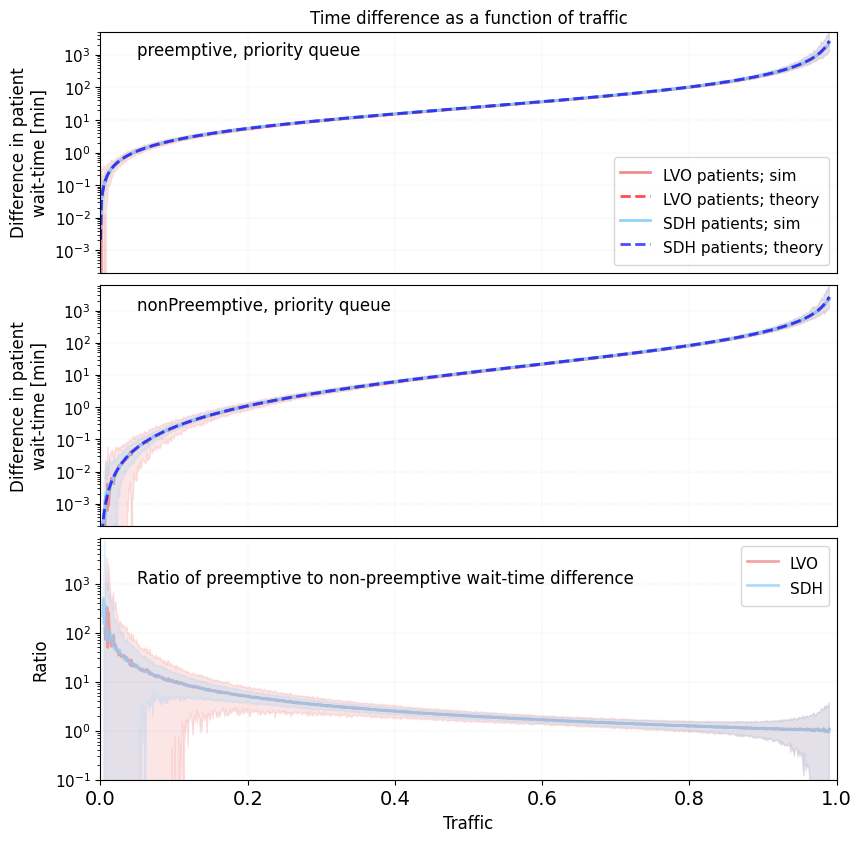

In [4]:
def plot_traffic (prioritytype='priority'):

    figsize=(9.5, 11)
    h  = plt.figure (figsize=figsize)
    gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
    gs.update (bottom=0.2)

    for gindex, queuetype in enumerate (queuetypes):

        data = results['traffics'][queuetype][prioritytype]
        xvalues = numpy.array (data['LVO']['timeSaved']['xvalue'])
        ylabel = 'Difference in patient\nwait-time [min]'

        axis = h.add_subplot (gs[gindex])

        for diseasename in diseasenames:
            yvalues = -1* (data[diseasename]['timeSaved']['sim']['mean'])
            lower95 = -1* (data[diseasename]['timeSaved']['sim']['upper95'])
            upper95 = -1* (data[diseasename]['timeSaved']['sim']['lower95'])
            label = 'LVO patients; sim'.format (diseasename) if diseasename == 'LVO' else \
                    'SDH patients; sim'.format (diseasename)
            axis.plot (xvalues, yvalues, color=colors['sim_'+diseasename], linestyle='-',
                       alpha=0.9, linewidth=2, label=label)
            axis.fill_between (xvalues, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
            label = 'LVO patients; theory'.format (diseasename) if diseasename == 'LVO' else \
                    'SDH patients; theory'.format (diseasename)
            axis.plot (xvalues, -1* (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
                       alpha=0.7, linewidth=2, label=label)

        # Format others
        axis.tick_params(axis='both', which='major', labelsize=11)
        if gindex==0:
            axis.set_title ('Time difference as a function of traffic', fontsize=12)
            axis.legend(loc=4, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
        axis.text(0.05, 1000, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)

        # Format x-axis
        axis.set_xlim (0, 1)
        xticks = numpy.linspace (0, 1, 6)
        axis.set_xticks (xticks)
        for xtick in axis.get_xticks():
            axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        if gindex == 2:
            axis.set_xlabel ('Traffic', fontsize=12)
            for tick in axis.xaxis.get_major_ticks(): tick.label1.set_fontsize(14) 
        else:
            axis.get_xaxis().set_visible(False)

        # Format y-axis        
        axis.set_ylim (ymin=2e-4)
        axis.set_yscale('log', nonpositive='clip')
        axis.set_ylabel (ylabel, fontsize=12)
        for ytick in axis.get_yticks():
            axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

    ## Ratio between preemptive vs non-preemptive
    axis = h.add_subplot (gs[2])

    for diseasename in diseasenames:
        prem = numpy.abs (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        nonprem = numpy.abs (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        ratio = prem / nonprem

        premlower95 = numpy.abs (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        premupper95 = numpy.abs (results['traffics']['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        premsd = (premlower95 - premupper95)/1.96
        nonpremlower95 = numpy.abs (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        nonpremupper95 = numpy.abs (results['traffics']['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

        ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
        ratio95 = ratiosd * 1.96

        axis.plot (xvalues, ratio, color=colors['sim_'+diseasename], linestyle='-',
                   alpha=0.7, linewidth=2, label='LVO' if diseasename == 'LVO' else 'SDH')
        axis.fill_between (xvalues, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

    # Format others
    axis.tick_params(axis='both', which='major', labelsize=11)
    axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
    text = 'Ratio of preemptive to non-preemptive wait-time difference'
    axis.text(0.05, 1000, text, fontsize=12)

    # Format x-axis
    axis.set_xlim (0, 1)
    xticks = numpy.linspace (0, 1, 6)
    axis.set_xticks (xticks)
    for xtick in axis.get_xticks():
        axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
    axis.set_xlabel ('Traffic', fontsize=12)
    for tick in axis.xaxis.get_major_ticks(): tick.label1.set_fontsize(14) 

    # Format y-axis        
    axis.set_ylim (ymin=1e-1)
    axis.set_yscale('log', nonpositive='clip')
    axis.set_ylabel ('Ratio', fontsize=12)
    for ytick in axis.get_yticks():
        axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

    plt.show()
    h.savefig (plotPath + 'AILVOICH_1D_traffic_{0}.png'.format (prioritytype), dpi=600)
    plt.close('all')    

plot_traffic (prioritytype='priority')
#plot_traffic (prioritytype='hierarchical')

Points:
1. mean values from theory matches that of simulation
2. Time-savings among LVO patients are above time delay experienced by ICH patients
3. non-preemptive assumptions matters more at lower traffic
4. With 2 diseases and 1 AI triaging LVO, priority and hierarchical queues return same outputs

#### Results from one trial:

In [5]:
with open ('AILVO_traffic_isPreemptive1traffic997_000th.p', 'rb') as f:
    data = pickle.load (f)
f.close()

C:\Users\Michelle.Mastrianni\AppData\Local\Temp\1\ipykernel_16896\2199210113.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  data = pickle.load (f)


In [6]:
data['wpatients'].keys()

Index(['is_interrupting', 'is_diseased', 'is_positive', 'service_time',
       'group_name', 'disease_name', 'AILVO', 'fifo', 'fifo_trigger',
       'fifo_open', 'fifo_close', 'priority', 'priority_trigger',
       'priority_open', 'priority_close', 'hierarchical',
       'hierarchical_trigger', 'hierarchical_open', 'hierarchical_close',
       'trial_id', 'patient_id', 'delta'],
      dtype='object')

## AILVOSes

diseaseProbICH = 0.211 from 10.2214/AJR.24.31639, Table 1

diseaseProbLVO = 0.125 from 10.3389/fneur.2023.1179250, p.3

sameReadTime = 30

groupProbNCCT = 0.7

groupProbCTA  = 0.3

traffic = 0.8

nRad = 1

0.45907564758917374
0.9960120240480962
0.45907564758917374
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


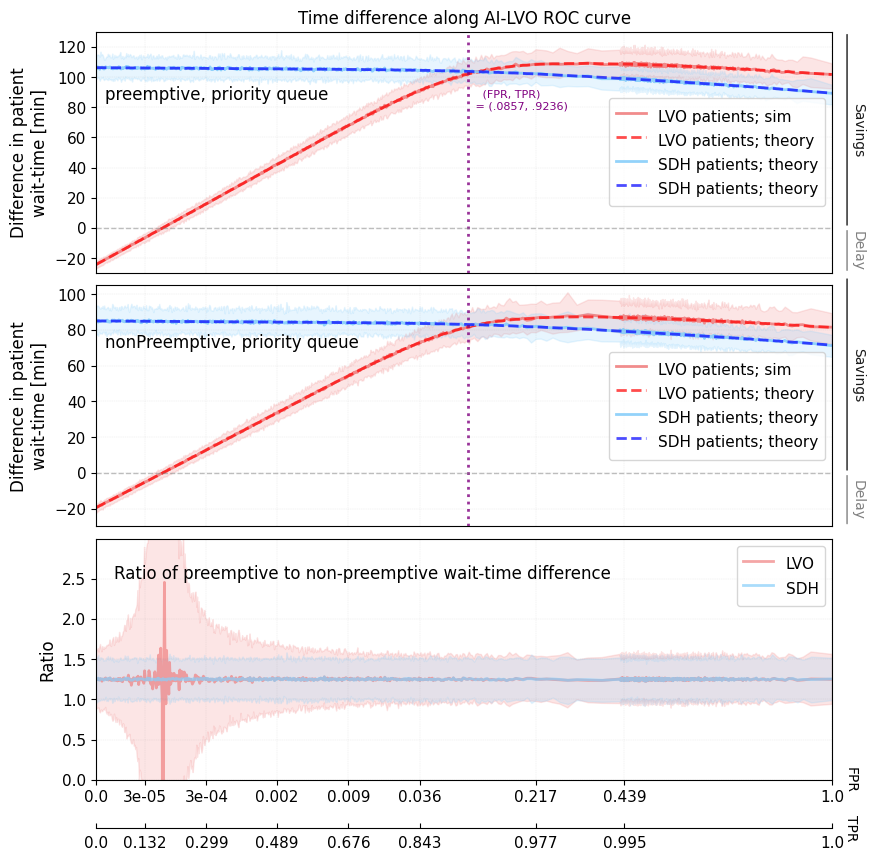

0.45907564758917374
0.9960120240480962
0.45907564758917374
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


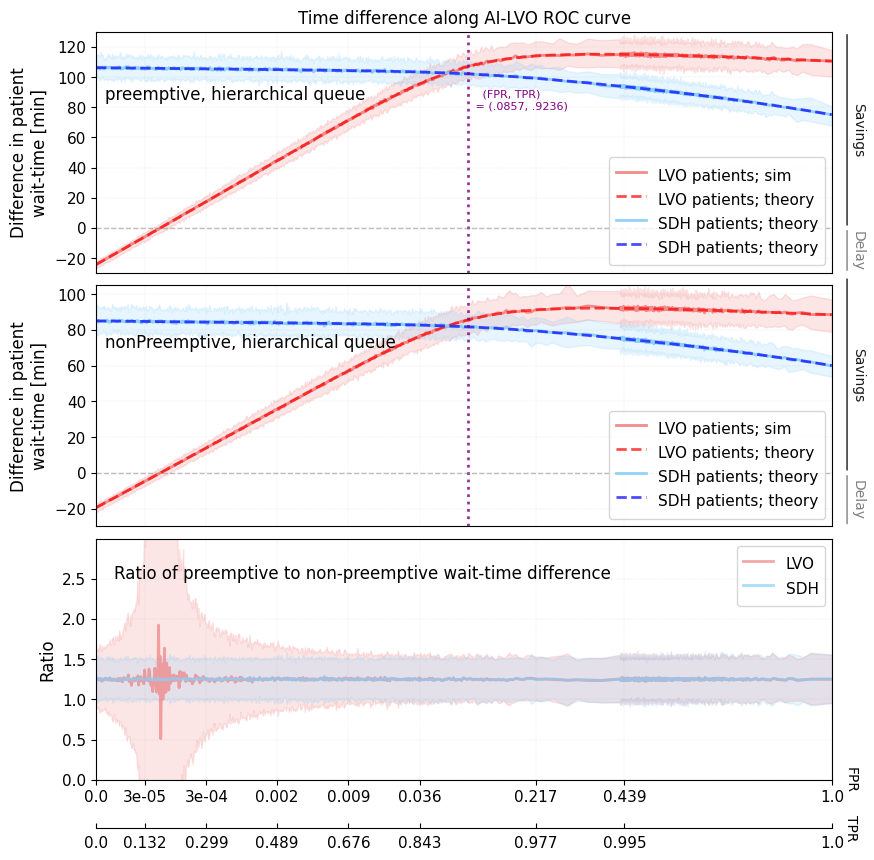

0.35169527948821233
0.9960120240480962
0.35169527948821233
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


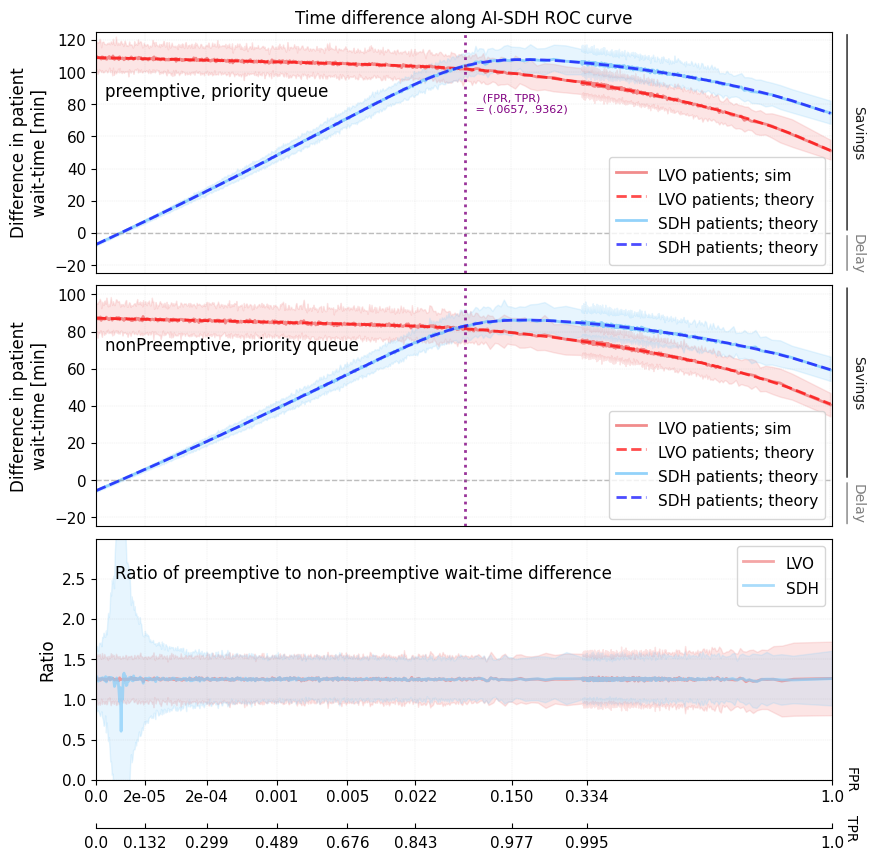

0.35169527948821233
0.9960120240480962
0.35169527948821233
0.9960120240480962
linear indices [  0 249 499 748 998]
selected indices [  0  66 150 245 339 423 490 538 998]


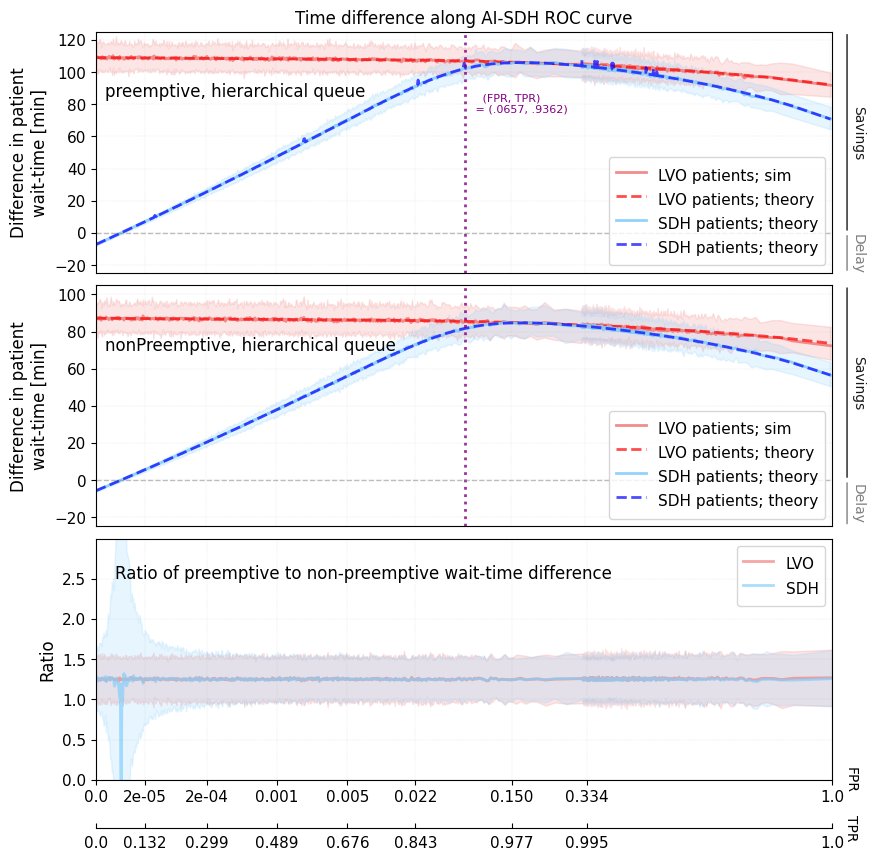

In [20]:
import matplotlib.ticker as ticker

def plot_AILVOSes (prioritytype='priority',  avar='AILVOSes'):

    figsize=(9.5, 11)
    h  = plt.figure (figsize=figsize)
    gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
    gs.update (bottom=0.2)

    for gindex, queuetype in enumerate (queuetypes):

        data = results[avar][queuetype][prioritytype]

        print(1-data['LVO']['timeSaved']['sp'][600])
        print(data['LVO']['timeSaved']['se'][600])
    
        xvalues = 1- numpy.array (data['LVO']['timeSaved']['sp'])
        zvalues = numpy.array (data['LVO']['timeSaved']['se'])
        xvalues_sqrt = 1- numpy.array (data['LVO']['timeSaved']['sp']) + numpy.array (data['LVO']['timeSaved']['se'])
        
        ylabel = 'Difference in patient\nwait-time [min]'

        axis = h.add_subplot (gs[gindex])

        for diseasename in diseasenames:
            yvalues = -1 * data[diseasename]['timeSaved']['sim']['mean']
            lower95 = -1 * data[diseasename]['timeSaved']['sim']['upper95']
            upper95 = -1 * data[diseasename]['timeSaved']['sim']['lower95']
            label  = 'LVO patients; sim'.format (diseasename) if diseasename == 'LVO' else 'SDH patients; theory'.format (diseasename)
            axis.plot (xvalues_sqrt, yvalues, color=colors['sim_'+diseasename], linestyle='-',
                       alpha=0.9, linewidth=2, label=label)
            axis.fill_between (xvalues_sqrt, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
            label  = 'LVO patients; theory'.format (diseasename) if diseasename == 'LVO' else 'SDH patients; theory'.format (diseasename) 
            axis.plot (xvalues_sqrt, -1 * (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
                       alpha=0.7, linewidth=2, label=label)

        # Format others
        axis.tick_params(axis='both', which='major', labelsize=11)
        if gindex==0:
            if avar == 'AILVOSes':
                axis.set_title ('Time difference along AI-LVO ROC curve', fontsize=12)
            else:
                axis.set_title ('Time difference along AI-SDH ROC curve', fontsize=12)
        if queuetype == 'preemptive':
            axis.text(0.025, 85, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)
        else:
            axis.text(0.025, 70, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)
        if queuetype == 'preemptive' and avar == 'AILVOSes':
            axis.text(1.02, 79, '   (FPR, TPR) \n = (.0857, .9236)', color = 'purple', fontsize=8)
        if queuetype == 'preemptive' and avar == 'AIICHSes':
            axis.text(1.02, 75, '   (FPR, TPR) \n = (.0657, .9362)', color = 'purple', fontsize=8)
            
        #axis.axvline(x=0.0657, color='black', alpha = 0.3, linestyle=':', linewidth=2, label='Typical SDH AI threshold')
        axis.legend(loc='best', ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)

            
        # Format x-axis

        axis.set_xlim(0, 0.1)
        n_points = 8
        tanh_space = numpy.linspace(-7.5, 10, n_points)  # Wider range creates more clustering at ends
        tanh_values = numpy.tanh(0.1*tanh_space)
        tanh_normalized = 0.54 * ((tanh_values - tanh_values.min()) / (tanh_values.max() - tanh_values.min()) )
        nonlinear_indices = (tanh_normalized * (len(xvalues) - 1)).astype(int)
        if nonlinear_indices[-1] != len(xvalues) - 1:  # Check if last index is missing
            nonlinear_indices = numpy.append(nonlinear_indices, len(xvalues) - 1)

        xticks = numpy.linspace (0, 2, 5)
        selected_indices = numpy.round(nonlinear_indices).astype(int)
        selected_xvalues_transformed = xvalues_sqrt[selected_indices]     # Original x-values corresponding to sqrt(xvalues)

        axis.set_xticks (xticks)
        for xtick in selected_xvalues_transformed:
            axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        if avar == 'AILVOSes':
            axis.axvline(x=1-0.9143+0.9236, color='purple', alpha = 0.8, linestyle=':', linewidth=2, label='Typical LVO AI threshold')
        else:
            axis.axvline(x=1-0.9343+0.9362, color='purple', alpha = 0.8, linestyle=':', linewidth=2, label='Typical SDH AI threshold')
        axis.get_xaxis().set_visible(False)

        # Format y-axis 
        if queuetype == 'preemptive' and avar == 'AILVOSes':
            axis.set_ylim (ymin=-30, ymax = 130)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100, 120])
        elif queuetype == 'preemptive' and avar == 'AIICHSes':
            axis.set_ylim (ymin=-25, ymax = 125)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100, 120])
        elif queuetype == 'nonPreemptive' and avar == 'AILVOSes':
            axis.set_ylim (ymin=-30, ymax = 105)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100])
        elif queuetype == 'nonPreemptive' and avar == 'AIICHSes':
            axis.set_ylim (ymin=-25, ymax = 105)
            axis.set_yticks([-20, 0, 20, 40, 60, 80, 100])
        axis.set_ylabel (ylabel, fontsize=12)
        for ytick in axis.get_yticks():
            axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
        axis.axhline(y=0, color='gray', alpha=0.5, linestyle='--', linewidth=1)
    
        # for xval, zval in zip(xvalues, zvalues):
        #     plt.axvline(x=xval, color='gray', linestyle='--', alpha=0.5)

        # Bracket from 0 up to the top (Savings)

        if queuetype == 'preemptive' and avar == 'AILVOSes':
            ymax = 130
        elif queuetype == 'preemptive' and avar == 'AIICHSes':
            ymax = 125
        elif queuetype == 'nonPreemptive' and avar == 'AILVOSes':
            ymax = 110
        else:
            ymax = 105
        if avar == 'AILVOSes':
            ymin = -30
            delaycoord = -15
        else:
            ymin = -25
            delaycoord = -12.5
            
        axis.annotate(
            '', 
            xy=(1.02, 0),           # top in data coords
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, ymax),          # zero
            textcoords=('axes fraction', 'data'),
            arrowprops=dict( 
                arrowstyle = '-',
                fc='black', 
                ec='black', 
                lw=1,
                alpha=0.9
            ),
            clip_on=False
        )
        axis.text(
            1.025,                       # a bit to the right
            ymax/2,                    # halfway between top and 0
            "Savings", 
            rotation=-90,
            va='center', 
            ha='left',
            color='black',
            alpha=0.9,
            transform=axis.get_yaxis_transform()  # positions text in data coords
        )
        
        # Bracket from 0 down to the bottom (Delay)
        axis.annotate(
            '',
            xy=(1.02, 0),
            xycoords=('axes fraction', 'data'),
            xytext=(1.02, ymin),
            textcoords=('axes fraction', 'data'),
            arrowprops=dict(
                arrowstyle='-', 
                fc='black', 
                ec='black', 
                lw=1, 
                alpha=0.5
            ),
            clip_on=False
        )
        axis.text(
            1.025,
            delaycoord,  # or pick something representative
            "Delay",
            rotation=-90,
            va='center',
            ha='left',
            color='black',
            alpha=0.5,
            transform=axis.get_yaxis_transform()
        )
        # -------------------------------------


    ## Ratio between preemptive vs non-preemptive
    axis = h.add_subplot (gs[2])

    for diseasename in diseasenames:
        prem = -1 * (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        nonprem = -1 * (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
        ratio = prem / nonprem

        premlower95 = -1 * (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        premupper95 = -1 * (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        premsd = (premlower95 - premupper95)/1.96
        nonpremlower95 = -1 * (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
        nonpremupper95 =-1 * (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
        nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

        ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
        ratio95 = ratiosd * 1.96

        axis.plot (xvalues_sqrt, ratio, color=colors['sim_'+diseasename], linestyle='-',
                   alpha=0.7, linewidth=2, label='LVO' if diseasename == 'LVO' else 'SDH')
        axis.fill_between (xvalues_sqrt, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

    # Format others
    axis.tick_params(axis='both', which='major', labelsize=11)
    axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
    text = 'Ratio of preemptive to non-preemptive wait-time difference'
    axis.text(0.05, 2.5, text, fontsize=12)

    # Format x-axis
    axis.set_xlim(0, 0.1)
    n_points = 8
    tanh_space = numpy.linspace(-7.5, 10, n_points)  # Wider range creates more clustering at ends
    tanh_values = numpy.tanh(0.1*tanh_space)
    tanh_normalized = 0.54 * ((tanh_values - tanh_values.min()) / (tanh_values.max() - tanh_values.min()) )
    nonlinear_indices = (tanh_normalized * (len(xvalues) - 1)).astype(int)
    if nonlinear_indices[-1] != len(xvalues) - 1:  # Check if last index is missing
        nonlinear_indices = numpy.append(nonlinear_indices, len(xvalues) - 1)

    # Convert to integers for array indexing
    selected_indices = numpy.round(nonlinear_indices).astype(int)
    print('linear indices', numpy.linspace(0, len(xvalues) - 1, 5, dtype=int))
    print('selected indices', selected_indices)

    #selected_indices = numpy.linspace(0, len(xvalues) - 1, 5, dtype=int)
    # xvalues_log = numpy.log(xvalues_sqrt)
    # selected_xvalues_log = xvalues_log[selected_indices]
    # selected_xvalues_transformed = numpy.exp(selected_xvalues_log)
    selected_xvalues_transformed = xvalues_sqrt[selected_indices]     # Original x-values corresponding to sqrt(xvalues)
    selected_xvalues_original = xvalues[selected_indices] 
    selected_zvalues_original = zvalues[selected_indices]
    axis.set_xticks(selected_xvalues_transformed)
    #axis.set_xticklabels([f'{xtick:.0e}' for xtick in selected_xvalues_original])  # Display original values
    axis.set_xticklabels([
        0.0 if i == 0 else (1.0 if i==8 else (f"{xtick:.0e}" if i < 3 else f"{xtick:.3f}"))
        for i, xtick in enumerate(selected_xvalues_original)
    ])
    

    axis.annotate(
    'FPR', 
    xy=(1.025, 0),  # Adjust the position: (x, y) relative to the axis
    xycoords='axes fraction',  # Use fraction of the axis dimensions
    fontsize=10, 
    rotation=270,  # Rotate the label vertically
    ha='center',  # Horizontal alignment
    va='center'   # Vertical alignment
    )   
    
    # Add vertical lines for each tick
    for xtick in selected_xvalues_transformed:
        axis.axvline(x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
    
    # Add the secondary x-axis for z-values
    secondary_axis = axis.secondary_xaxis(-0.2)  # Position below the primary axis
    secondary_axis.set_ticks(selected_xvalues_transformed)
    secondary_axis.set_xticklabels([
        0.0 if i == 0 else (1.0 if i==8 else (f'{zval:.3f}')) for i, zval in enumerate(selected_zvalues_original)
    ])
    # secondary_axis.xaxis.set_major_formatter(ticker.ScalarFormatter())
    # secondary_axis.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    

    
    # Optionally style ticks for better visibility
    secondary_axis.tick_params(axis='x', labelsize=11, which='both', direction = 'in', pad=5)
    axis.annotate(
    'TPR', 
    xy=(1.025, -0.2),  # Adjust the position: (x, y) relative to the axis
    xycoords='axes fraction',  # Use fraction of the axis dimensions
    fontsize=10, 
    rotation=270,  # Rotate the label vertically
    ha='center',  # Horizontal alignment
    va='center'   # Vertical alignment
    )   
    
    # Format y-axis        
    axis.set_ylim (0, 3)
    yticks = numpy.linspace (0, 3, 7)[:-1]
    axis.set_yticks (yticks)
    axis.set_ylabel ('Ratio', fontsize=12)
    for ytick in axis.get_yticks():
        axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

    plt.show()
    h.savefig (plotPath + f'AILVO_1D_{avar}_{0}.png'.format (prioritytype), dpi=600)
    plt.close('all')    


# def plot_AILVOSes (prioritytype='priority', avar='AILVOSes'):

#     figsize=(9.5, 11)
#     h  = plt.figure (figsize=figsize)
#     gs = gridspec.GridSpec (3, 1, wspace=0.2, hspace=0.05)
#     gs.update (bottom=0.2)

#     for gindex, queuetype in enumerate (queuetypes):

#         data = results[avar][queuetype][prioritytype]
#         diseasename = 'ICH' if 'ICH' in avar else 'LVO'
#         xvalues = 1- numpy.array (data[diseasename]['timeSaved']['sp'])
#         ylabel = 'Difference in patient\nwait-time [min]'

#         axis = h.add_subplot (gs[gindex])

#         for diseasename in diseasenames:
#             yvalues = -1* (data[diseasename]['timeSaved']['sim']['mean'])
#             lower95 = -1* (data[diseasename]['timeSaved']['sim']['upper95'])
#             upper95 = -1* (data[diseasename]['timeSaved']['sim']['lower95'])
#             label = 'Time-saved for {0} patients; sim'.format (diseasename)
#             axis.plot (xvalues, yvalues, color=colors['sim_'+diseasename], linestyle='-',
#                        alpha=0.9, linewidth=2, label=label)
#             axis.fill_between (xvalues, lower95, upper95, color=colors['sim_'+diseasename], alpha=0.2)
#             label = 'Time-saved for {0} patients; theory'.format (diseasename)
#             axis.plot (xvalues, -1* (data[diseasename]['timeSaved']['theory']['delta']), color=colors['theory_'+diseasename], linestyle='--',
#                        alpha=0.7, linewidth=2, label=label)

#         # Format others
#         axis.tick_params(axis='both', which='major', labelsize=11)
#         if gindex==0:
#             name = 'AI-LVO' if avar=='AILVOSes' else 'AI-ICH'
#             axis.set_title ('Time difference along {0} ROC curve'.format (name), fontsize=12)
#             axis.legend(loc='best', ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
#         axis.text(0.58, 8, '{0}, {1} queue'.format (queuetype, prioritytype), fontsize=12)

#         # Format x-axis
#         axis.set_xlim (0, 1)
#         xticks = numpy.linspace (0, 1, 6)
#         axis.set_xticks (xticks)
#         for xtick in axis.get_xticks():
#             axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
#         axis.get_xaxis().set_visible(False)

#         # Format y-axis        
#         axis.set_ylim (ymin=0)
#         axis.set_ylabel (ylabel, fontsize=12)
#         for ytick in axis.get_yticks():
#             axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

#     ## Ratio between preemptive vs non-preemptive
#     axis = h.add_subplot (gs[2])

#     for diseasename in diseasenames:
#         prem = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
#         nonprem = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['mean'])
#         ratio = prem / nonprem

#         premlower95 = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
#         premupper95 = -1* (results[avar]['preemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
#         premsd = (premlower95 - premupper95)/1.96
#         nonpremlower95 = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['upper95'])
#         nonpremupper95 = -1* (results[avar]['nonPreemptive'][prioritytype][diseasename]['timeSaved']['sim']['lower95'])
#         nonpremsd = (nonpremlower95 - nonpremupper95)/1.96

#         ratiosd = numpy.sqrt (premsd**2 / prem**2 + prem**2 * nonpremsd**2 / nonprem**4)
#         ratio95 = ratiosd * 1.96

#         axis.plot (xvalues, ratio, color=colors['sim_'+diseasename], linestyle='-',
#                    alpha=0.7, linewidth=2, label=diseasename)
#         axis.fill_between (xvalues, ratio - ratio95, ratio + ratio95, color=colors['sim_'+diseasename], alpha=0.2)

#     # Format others
#     axis.tick_params(axis='both', which='major', labelsize=11)
#     axis.legend(loc=1, ncol=1, fontsize=11, handleheight=2, labelspacing=0.03)
#     text = 'Ratio of preemptive to non-preemptive wait-time difference'
#     axis.text(0.05, 2.5, text, fontsize=12)

#     # Format x-axis
#     axis.set_xlim (0, 1)
#     xticks = numpy.linspace (0, 1, 6)
#     axis.set_xticks (xticks)
#     for xtick in axis.get_xticks():
#         axis.axvline (x=xtick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)
#     axis.set_xlabel ('False-Positive Rate along ROC curve', fontsize=12)
#     for tick in axis.xaxis.get_major_ticks(): tick.label1.set_fontsize(14) 

#     # Format y-axis        
#     axis.set_ylim (0, 3)
#     yticks = numpy.linspace (0, 3, 7)[:-1]
#     axis.set_yticks (yticks)
#     axis.set_ylabel ('Ratio', fontsize=12)
#     for ytick in axis.get_yticks():
#         axis.axhline (y=ytick, color='gray', alpha=0.2, linestyle='--', linewidth=0.3)

#     plt.show()
#     h.savefig (plotPath + 'AILVOICH_1D_{0}_{1}.png'.format (avar, prioritytype), dpi=600)
#     plt.close('all')    

plot_AILVOSes (prioritytype='priority', avar='AILVOSes')
plot_AILVOSes (prioritytype='hierarchical', avar='AILVOSes')

plot_AILVOSes (prioritytype='priority', avar='AIICHSes')
plot_AILVOSes (prioritytype='hierarchical', avar='AIICHSes')